In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
import numpy as np

img=mpimg.imread('Synthetic Data Generation/testimg.png')

In [2]:
def calc_point_class(x, y, image, classes):
    pxl = rgb2hex(image[int((image.shape[0]-1)*x), int((image.shape[1]-1)*y)])
    #print(pxl)
    c = classes[pxl]
    return c
    
def split_image(image):
    classes = {}
    k = 0
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            col = rgb2hex(image[i, j])
            if col not in classes.keys():
                classes.update({col: k})
                k += 1
                
    return classes

In [3]:
classes = split_image(img)
print(classes)

{'#ffffff': 0, '#3f48cc': 1, '#c3c3c3': 2, '#a349a4': 3, '#ed1c24': 4, '#ffaec9': 5, '#b97a57': 6}


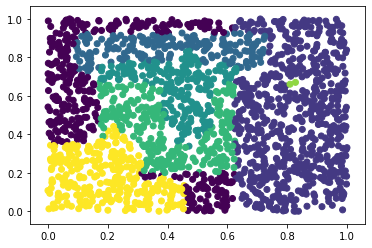

In [4]:
done = False
points = None
while not done:
    points = np.random.rand(2000,2)
    point_classes = np.apply_along_axis(lambda x: calc_point_class(x[0], x[1], img, classes), 1, points)
    done = 5 in point_classes

plt.scatter(points[:, 1], 1-points[:, 0], c = point_classes)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sys
#import sklearn

import CRIS.data as data
import CRIS.classify as classify
import CRIS.regress as regress

# reload
import importlib
importlib.reload( data )
importlib.reload( classify )
importlib.reload( regress )

og_set = np.arange(0, 2000)
og_inp = np.copy(points)#table_object.get_input_data()[og_set]
og_table = np.empty((og_inp.shape[0], len(classes.keys())))#table_object.get_class_data().T[og_set]
for i in range(og_inp.shape[0]):
    og_table[i] = np.zeros(len(classes.keys()))
    og_table[i, point_classes[i]] = 1

In [6]:
import cProfile
import OptimizationAlgorithms.GeneticAlgorithms as GeneticAlgorithms
import importlib
import PointInfomationEntropy
from PointInfomationEntropy import get_information_entropy_function, visualize_entropy_and_points
importlib.reload(PointInfomationEntropy)
importlib.reload(GeneticAlgorithms)

valf = get_information_entropy_function(og_inp, og_table)

ga = GeneticAlgorithms.GeneticAlgorithm(params={"fitness_function": valf,
                                                "time_constraint": 50,
                                                "point_count": 5,
                                                "axes": [(0.0, 1.0), (0.0, 1.0)],
                                                "population_size": 150}, testing_verbosity=2)

results = ga.run()
print(results)

[[0.83605075 0.34211106]
 [0.27687676 0.66403871]
 [0.52690161 0.50121405]
 [0.57160836 0.56228569]
 [0.34289495 0.17671473]]


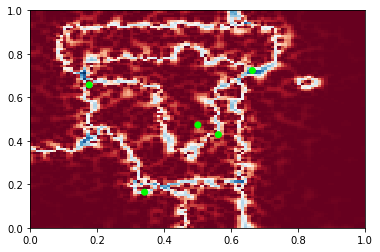

In [7]:
visualize_entropy_and_points(results, og_inp, og_table)

In [8]:
calc_point_class(.235, .7755, img, classes)

1

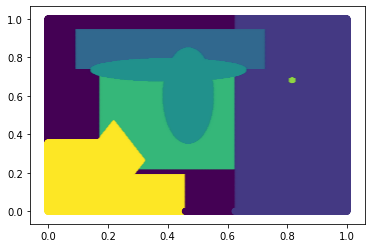

In [9]:
xpoints = np.zeros(1000*1000)
ypoints = np.zeros(1000*1000)
coloration = []
for i in range(0, 1000):
    for j in range(0, 1000):
        xpoints[i*1000+j] = j/1000
        ypoints[i*1000+j] = 1-(i/1000)
        coloration.append(calc_point_class(i/1000, j/1000, img, classes))

plt.scatter(xpoints, ypoints, c=coloration)
#plt.imshow(img, aspect="equal")